In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import glob
import os
import sys
import json
import logging
from itertools import chain

import requests
from tqdm import tqdm, tqdm_notebook, tnrange
#tqdm = tqdm_notebook

import vigra
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from numba import jit

from dvidutils import LabelMapper
from libdvid import DVIDNodeService

from neuclease.dvid import *
from neuclease.util import Timer
from neuclease.misc import find_best_plane

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from DVIDSparkServices.spark_launch_scripts.janelia_lsf.lsf_utils import get_hostgraph_url

In [3]:
handler = logging.StreamHandler(sys.stdout)
root_logger = logging.getLogger()
root_logger.handlers = []
root_logger.addHandler(handler)
root_logger.setLevel(logging.INFO)
logging.getLogger('kafka').setLevel(logging.WARNING)

In [5]:
cd /nrs/flyem/bergs/complete-ffn-agglo/

/nrs/flyem/bergs/complete-ffn-agglo


In [19]:
current_master = DvidInstanceInfo('emdata3:8900', '7254', 'segmentation')
chris_test_node = ('emdata1:8400', '363f', 'segmentation')

## Load test assignment

In [8]:
assignment = json.load(open('/nrs/flyem/bergs/complete-ffn-agglo/test-assignment-good-edges-20180725.json', 'r'))

In [23]:
test_edges = [(task['supervoxel ID 1'], task['supervoxel ID 2']) for task in assignment['task list']]

In [24]:
len(test_edges)

100

In [25]:
test_keys = set(f'{a}+{b}' for (a,b) in test_edges)

In [17]:
results = []
for i in range(1, 9):
    kv_instance = (*current_master[:2], f'focused_merged_{i:02d}')
    keys = fetch_keys(*kv_instance)
    keys = set(keys).intersection(test_keys)
    print(f"Found {len(keys)} test keys in {kv_instance[2]}")
    for key in keys:
        task = fetch_key(*kv_instance, key)
        results.append([key, task['result']])

Found 0 test keys in focused_merged_01
Found 0 test keys in focused_merged_02
Found 0 test keys in focused_merged_03
Found 0 test keys in focused_merged_04
Found 0 test keys in focused_merged_05
Found 0 test keys in focused_merged_06
Found 0 test keys in focused_merged_07
Found 0 test keys in focused_merged_08


In [26]:
keys = fetch_keys(*chris_test_node[:2], 'segmentation_merged')
print(len(keys))
print(len(test_keys.intersection(keys)))

6683
100


In [29]:
results = []
for key in test_keys:
    task = fetch_key(*chris_test_node[:2], 'segmentation_merged', key, as_json=True)
    results.append(task['result'])

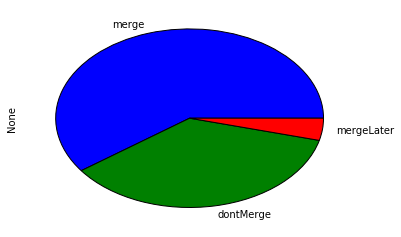

In [35]:
pd.Series(results).value_counts().plot(kind='pie')

In [36]:
pd.Series(results).value_counts()

merge         60
dontMerge     36
mergeLater     4
dtype: int64